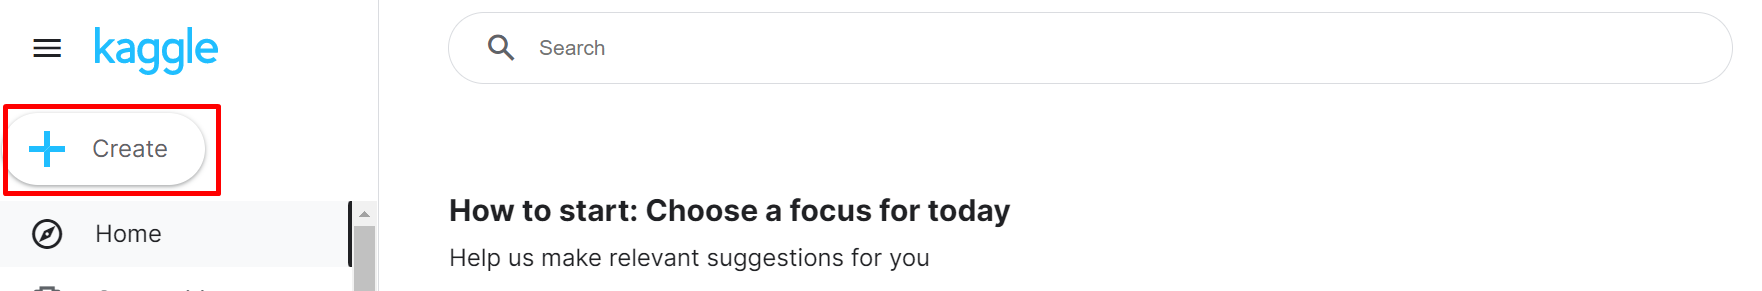

## Imports

In this notebook we will query the Ethereum BigQuery dataset available on Kaggle and store the results in a pandas DataFrame. To do that, first we import the necessary libraries. 

In [1]:
from google.cloud import bigquery
import pandas as pd

## Querying BigQuery
We will query the BigQuery dataset and store the results in a pandas DataFrame. For each task we will first create a BigQuery client object, then define a query string, and finally use the `query()` method of the client object to execute the query and store the results in a pandas DataFrame.

### Retrieving the top 5 balances in Ethereum

Execute the query on the `balances` table and store the results in a pandas DataFrame.We will use the `query_job` object to execute the query and store the results in a pandas DataFrame.

In [2]:
client = bigquery.Client()

query = '''
SELECT *
FROM  `bigquery-public-data.crypto_ethereum.balances`
ORDER BY eth_balance desc
LIMIT 5
'''

Using Kaggle's public dataset BigQuery integration.


In [3]:
query_job = client.query(query)

iterator = query_job.result(timeout=30)
rows = list(iterator)

df = pd.DataFrame(data=[list(x.values()) for x in rows], columns=list(rows[0].keys()))

df.head(5)

,address,eth_balance
0,0x00000000219ab540356cbb839cbe05303d7705fa,14199511007718564869804029
1,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,4079301067665648753468962
2,0xf977814e90da44bfa03b6295a0616a897441acec,2436827380042189674547702
3,0xda9dfa130df4de4673b89022ee50ff26f6ea73cf,2113030086367224616200000
4,0x0716a17fbaee714f1e6ab0f9d59edbc5f09815c0,2048606584289842563751000


#### Counting Ethereum Blocks by Year
Execute a query to count the number of Ethereum blocks by year. It will use the `client.query` method to execute the query, and store the results in a pandas DataFrame.

In [4]:
query = '''
SELECT EXTRACT (YEAR FROM timestamp) AS Year ,
COUNT (*)
FROM  `bigquery-public-data.crypto_ethereum.blocks`
GROUP BY Year
ORDER BY Year
'''
query_job = client.query(query)

iterator = query_job.result(timeout=30)
rows = list(iterator)
df = pd.DataFrame(data=[list(x.values()) for x in rows], columns=['Year','Blocks'])
df.drop(df[df['Year'] == 1970].index, inplace = True)
df.head(10)

,Year,Blocks
1,2015,778482
2,2016,2133924
3,2017,1920279
4,2018,2155929
5,2019,2204651
6,2020,2371753
7,2021,2351147
8,2022,1817600


#### Counting Ethereum Contracts by Year
Execute a query to count the number of Ethereum contracts by year. It will use the `client.query` method to execute the query, and store the results in a pandas DataFrame.

In [5]:
query = '''
SELECT EXTRACT (YEAR FROM block_timestamp) AS Year ,
COUNT (*)
FROM  `bigquery-public-data.crypto_ethereum.contracts`
GROUP BY Year
ORDER BY Year
'''
query_job = client.query(query)

iterator = query_job.result(timeout=30)
rows = list(iterator)
df = pd.DataFrame(data=[list(x.values()) for x in rows], columns=['Year','Contracts'])
df.head(10)

,Year,Contracts
0,2015,6187
1,2016,230818
2,2017,3733699
3,2018,8052342
4,2019,8416970
5,2020,16430978
6,2021,11213714
7,2022,3358244
